# Statistical Significance Testing Between User1 and Participant 1

Goal = determine the statistical signifance and rigity of Participant 1 and 2 step data. This will segway into our analysis and justify why our findings can be considered valid.

Importing needed modules first:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
from scipy.stats import rankdata
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import spearmanr
from scipy.stats import kendalltau

Copying over the data cleaning functions written by Martin

In [2]:
def read_CLEAN_data(filename):
    #Read in CSV file
    dat = pd.read_csv(filename)
    #Convert datetimes
    dat["Date"] = pd.to_datetime(dat["Date"], format = '%Y-%m-%d').dt.date
    
    return dat

def read_step_data(filename, read_type):
    read_type = read_type.lower()
    print("reading: " + filename)
    if read_type == "pacer":
        return read_Pacer_data(filename)
    elif read_type == "qsaccess" or read_type == "qs":
        return read_QS_data(filename)
    elif read_type == "xml":
        return read_XML_data(filename)
    elif read_type == "clean" or read_type == "cleaned":
        return read_CLEAN_data(filename)
    else:
        raise Exception("Not a valid file type to read! Use pacer, qs, xml or clean")

In [22]:
part1_data = read_step_data("../../data/cleaned/participant1.csv", 'clean')
part2_data = read_step_data("../../data/cleaned/participant2.csv", 'clean')

reading: ../../data/cleaned/participant1.csv
reading: ../../data/cleaned/participant2.csv



We assume that since people may decide to take different amounts of steps per day, such that there is no true pattern, thus we state that there is no easily identified distribution at play. Hence, we decide to use non-parametric statistics to gauge if this is true.

[Non Parametric Statistical Significance Teats](https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/)

[Introduction to Non Parametric Statistics](https://machinelearningmastery.com/a-gentle-introduction-to-nonparametric-statistics/)

[Normality Tests](https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/)


#### Creating the Test Datasets
From our above data preparations, we first need to create datasets solely containing our daily step counts. This will be used for each nonparametric statistical tool below. 

We expect that given User 1 and User 2 are different individuals, our statistical tests should discover that each sample was drawn from differing distributions, although there may be some noise

In [23]:
# Merging the two datasets to only keep dates where they both have data
sample = part1_data.merge(part2_data, how = "inner", on = 'Date', suffixes=['_p1', '_p2'])

# Renaming our columns to clearly distinguish which is User 1 Data and which is User 2 Data
# sample = sample.rename(columns = {'Steps_x':'User2_DailyStep', 'Steps_y':'User1_DailyStep'})

# Separate columns into individual lists for Mann-Whitney test analysis. These are our 2 independent samples
data1 = sample['Steps_p1']
data2 = sample['Steps_p2']

Plotting Data 1 and Data 2, we can see that there are multiple peaks, outliers and no defined shape to our daily step counts. 

Thus, we may need to use nonparametric methods, which although generalised, can still be used for inferences and making claims about findings and results. Please note that they will **not hold the same weight as similar claims with parametric methods** 

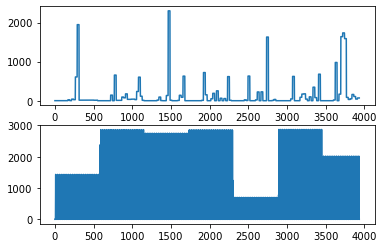

In [27]:
fig, axs= plt.subplots(2)

axs[0].plot(data1)
axs[1].plot(data2)

## Normality Testing

We cam use graphical and statistical methods that quantify how Gaussian a sample of data is. 

If the data fails those tests, we know to use nonparametric methods for Participant 1 and Participant 2

### Graphical Methods

#### Histogram Plot
If our samples of data has a Gaussian distribution, the histogram plot will show a bell shape.

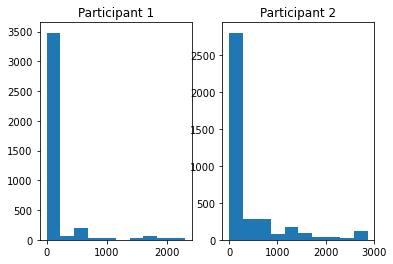

In [32]:
fig, axs= plt.subplots(1,2)

axs[0].hist(data1)
axs[0].set_title("Participant 1")
axs[1].hist(data2)
axs[1].set_title("Participant 2")

plt.show()

**Conclusion**

From above, Participant 1 and Participant 2 don't seem to have a bell shape. Thid could be due to the outliers in the data, with them having a tendency to be more than 30,000.

#### Quantile-Quantile Plots

A QQ plot generates its own sample of the idealized distribution that we are comparing with, in this case the Gaussian distribution. The idealized samples are divided into groups, called quantiles. Each data point in the sample is paired with a similar member from the idealized distribution at the same cumulative distribution.

The resulting points are plotted as a scatter plot with the idealized value on the x-axis and the data sample on the y-axis.

A perfect match for the distribution will be shown by a line of dots on a 45-degree angle from the bottom left of the plot to the top right. Often a line is drawn on the plot to help make this expectation clear. Deviations by the dots from the line shows a deviation from the expected distribution.

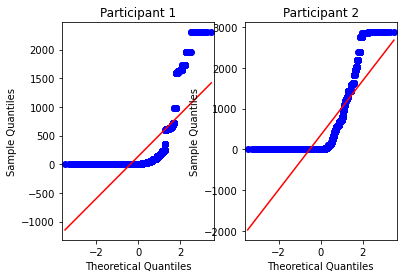

In [34]:
fig, axs= plt.subplots(1,2)

qqplot(data1, line = 's', ax=axs[0])
axs[0].set_title("Participant 1")
qqplot(data2, line = 's', ax=axs[1])
axs[1].set_title("Participant 2")

plt.show()

**Conclusion:**

There are quite a few large deviations in both Participant 1 and Partcipant 2 at the top and bottom of the plot. From this, we can say for the most part that our distribution is not normal.

### Statistical Methods
To provide an understanding of the terms that would be used:
- Statistic: A quantity calculated by the test that can be interpreted in the context of the test via comparing it to critical values from the distribution of the test statistic.
- p-value: Used to interpret the test, in this case whether the sample was drawn from a Gaussian distribution.

The p-value can be used to quickly and accurately interpret the shown statistics:
- **p <= alpha**: reject H0, not normal.
- **p > alpha**: fail to reject H0, normal.

A result above 5% does not mean that the null hypothesis is true. It means that it is very likely true given available evidence. 

#### Shapiro-Wilk Test

The Shapiro-Wilk test evaluates a data sample and quantifies how likely it is that the data was drawn from a Gaussian distribution

